     status     price  bed  bath  acre_lot     street    city          state  \
0  for_sale  180000.0  2.0   1.0  0.340000   732726.0  Agawam  Massachusetts   
1  for_sale  169900.0  2.0   2.0  0.020478  1194249.0  Agawam  Massachusetts   
2  for_sale  242000.0  2.0   2.0  0.032782   913299.0  Agawam  Massachusetts   
3  for_sale  299950.0  2.0   2.0  0.038085   560791.0  Agawam  Massachusetts   
4  for_sale  239900.0  3.0   1.0  0.460000   849166.0  Agawam  Massachusetts   

   zip_code  house_size  ...  two_adults_both_working_no_kids_living_wage  \
0    1001.0       676.0  ...                                        13.35   
1    1001.0       892.0  ...                                        13.35   
2    1001.0      1428.0  ...                                        13.35   
3    1001.0      1659.0  ...                                        13.35   
4    1001.0      1196.0  ...                                        13.35   

   two_adults_both_working_one_kid_living_wage  \
0     

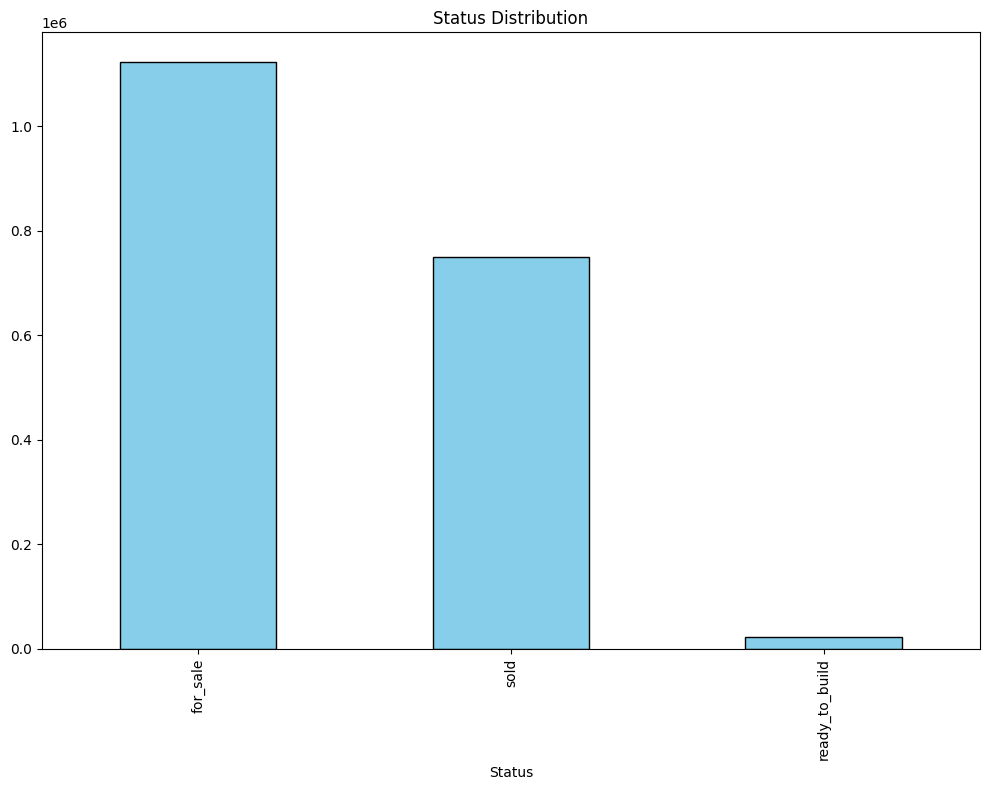

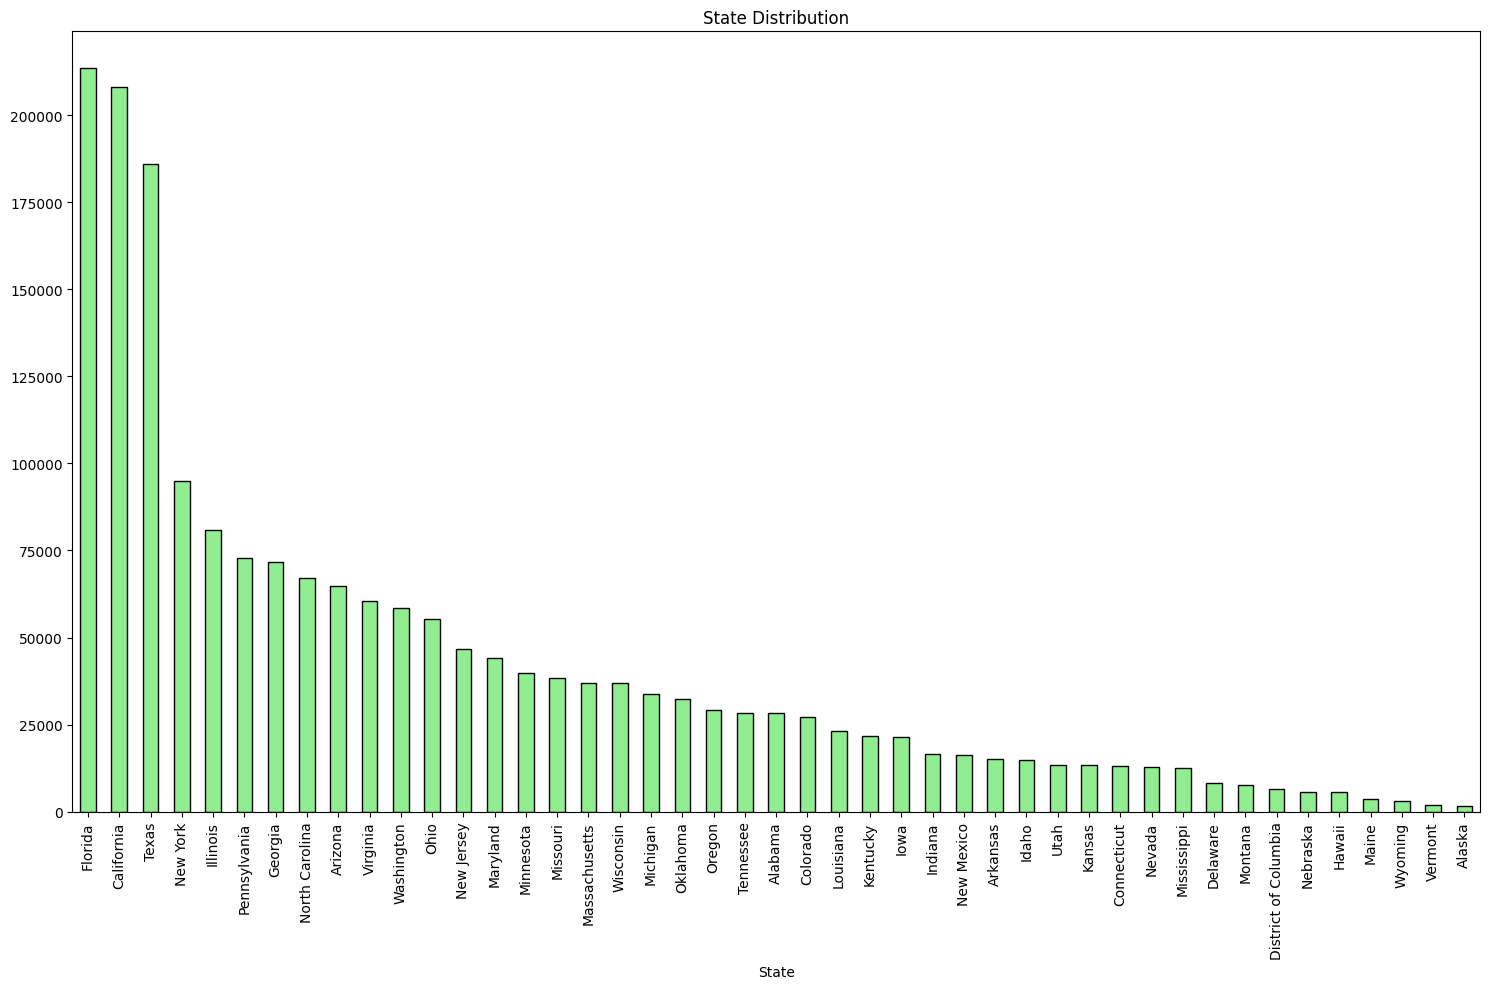

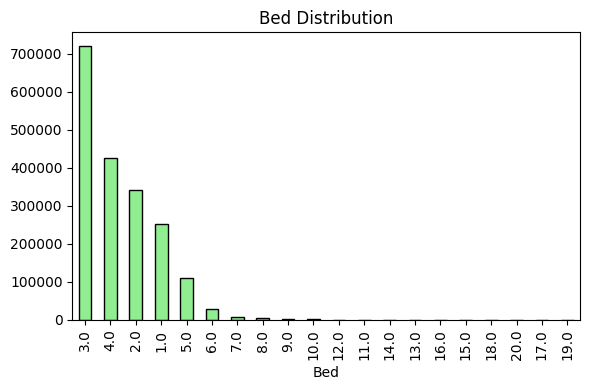

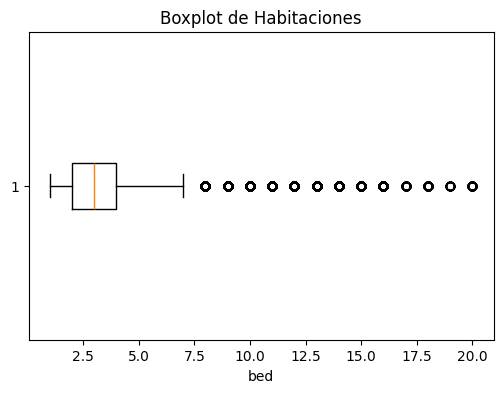

Outliers en 'bed': 10532


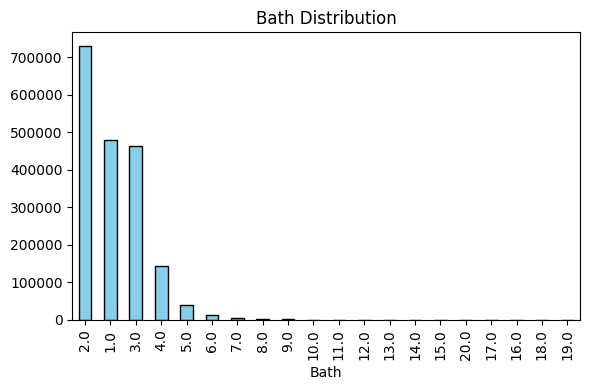

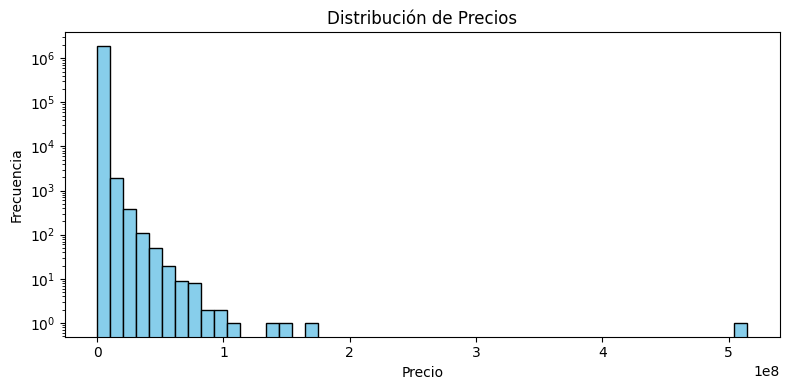

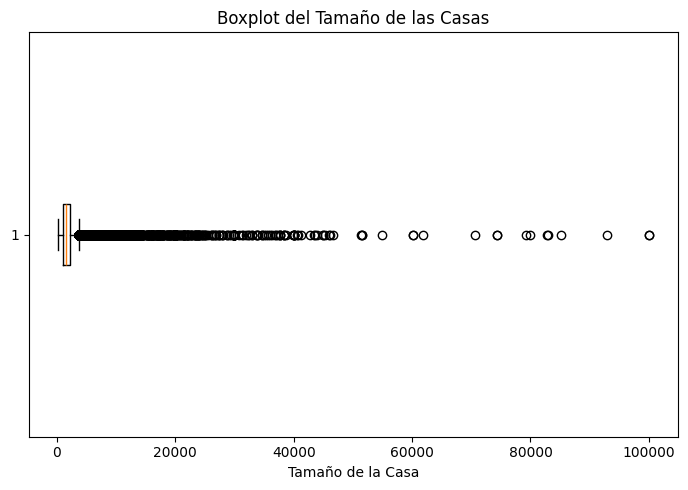

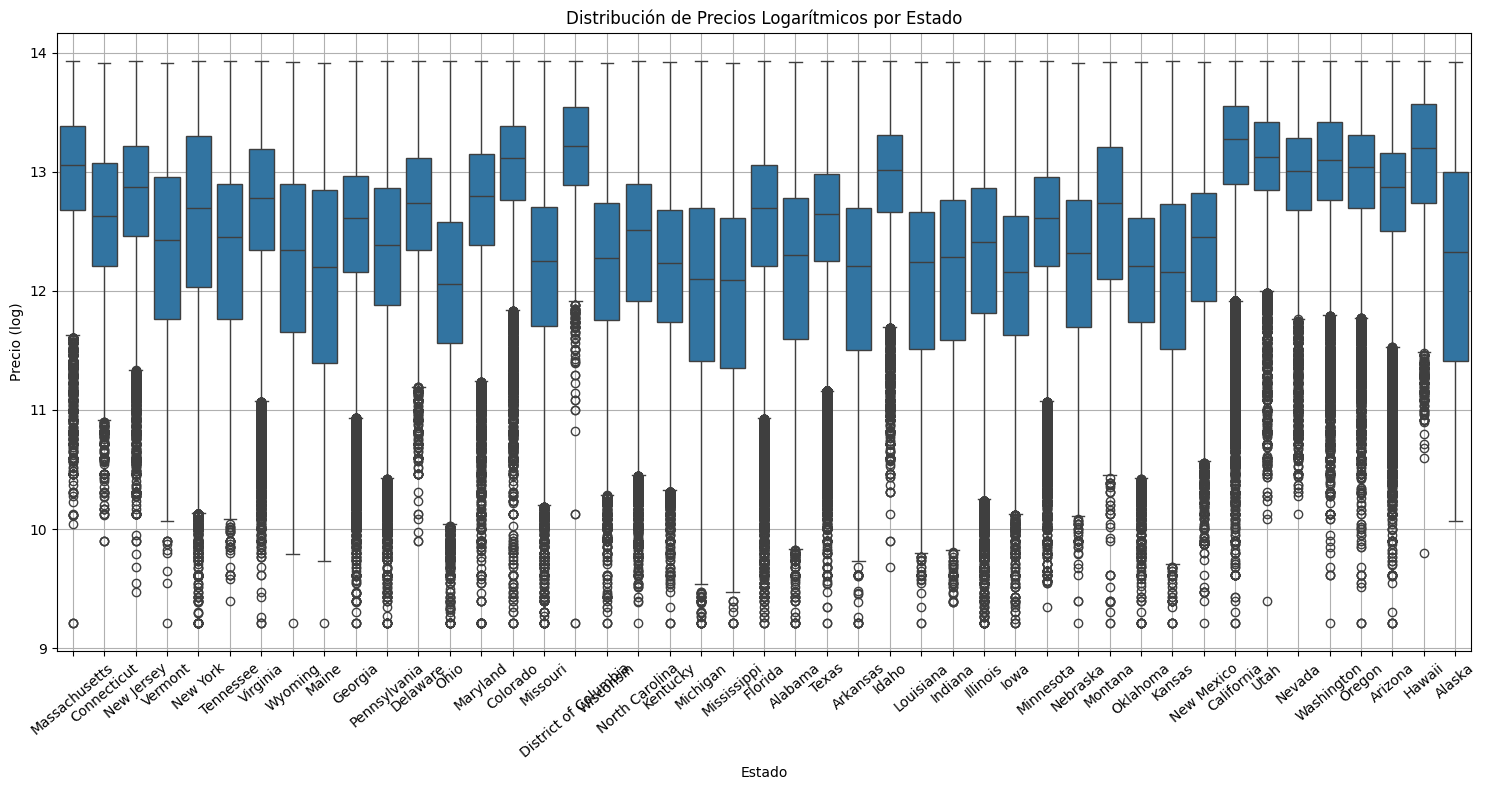

Archivo CSV con EDA procesado y transformación logarítmica creado.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar los datos
df = pd.read_csv("../data/processed/df4_nonull.csv")

# Verificar las primeras filas del dataset
print(df.head())

# 1. Distribución de la columna "status"
plt.figure(figsize=(10, 8))
df['status'].value_counts().plot(kind="bar", color="skyblue", edgecolor="k")
plt.title('Status Distribution')
plt.xlabel('Status')
plt.tight_layout()
plt.show()

# 2. Distribución por "state"
plt.figure(figsize=(15, 10))
df['state'].value_counts().plot(kind="bar", color="lightgreen", edgecolor="k")
plt.title('State Distribution')
plt.xlabel('State')
plt.tight_layout()
plt.show()

# 3. Distribución por "bed"
plt.figure(figsize=(6, 4))
df["bed"].value_counts().plot(kind="bar", color="lightgreen", edgecolor="k")
plt.title('Bed Distribution')
plt.xlabel('Bed')
plt.tight_layout()
plt.show()

# 4. Boxplot para 'bed'
plt.figure(figsize=(6, 4))
plt.boxplot(df['bed'], vert=False)
plt.title('Boxplot de Habitaciones')
plt.xlabel('bed')
plt.show()

# Identificar outliers en 'bed'
Q1 = df['bed'].quantile(0.25)
Q3 = df['bed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['bed'] < lower_bound) | (df['bed'] > upper_bound)]
print(f"Outliers en 'bed': {outliers.shape[0]}")

# Filtrar los outliers
df_clean = df[(df['bed'] >= lower_bound) & (df['bed'] <= upper_bound)]

# 5. Distribución por "bath"
plt.figure(figsize=(6, 4))
df_clean["bath"].value_counts().plot(kind="bar", color="skyblue", edgecolor="k")
plt.title('Bath Distribution')
plt.xlabel('Bath')
plt.tight_layout()
plt.show()

# 6. Distribución del precio
plt.figure(figsize=(8, 4))
plt.hist(df_clean['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Eliminar outliers de 'price'
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df_clean[(df_clean['price'] >= lower_bound) & (df_clean['price'] <= upper_bound)]

# 7. Boxplot de 'house_size'
plt.figure(figsize=(7, 5))
plt.boxplot(df_clean['house_size'], vert=False)
plt.title('Boxplot del Tamaño de las Casas')
plt.xlabel('Tamaño de la Casa')
plt.tight_layout()
plt.show()

# 8. Transformación logarítmica de 'house_size' y 'price'
df_clean['log_house_size'] = np.log(df_clean['house_size'] + 1)  # Asegurarse de que no haya valores cero
df_clean['log_price'] = np.log(df_clean['price'] + 1)  # Para evitar problemas con ceros en 'price'

# 9. Relación entre 'state' y 'price'
plt.figure(figsize=(15, 8))
sns.boxplot(x='state', y='log_price', data=df_clean)
plt.title('Distribución de Precios Logarítmicos por Estado')
plt.xlabel('Estado')
plt.ylabel('Precio (log)')
plt.xticks(rotation=40)
plt.grid(True)
plt.tight_layout()
plt.show()

# Guardar el DataFrame procesado
df_clean.to_csv('EDA_Final.csv', index=False)
print("Archivo CSV con EDA procesado y transformación logarítmica creado.")